# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 2: Non-Linear Least Square Estimation Problem*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Anthony | Kelly | Anthony Kelly, October 17, 2024 | 5 | 25% |
| Member 2: | Max | Willms | Max Willms, October 17, 2024 | 5 | 25% |
| Member 3: | David | Amoah Vervoorn | David Amoah Vervoorn, October 17, 2024 | 5 | 25% |
| Member 4: | Pinyi | Lin | Pinyi Lin, October 17, 2024 | 5 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

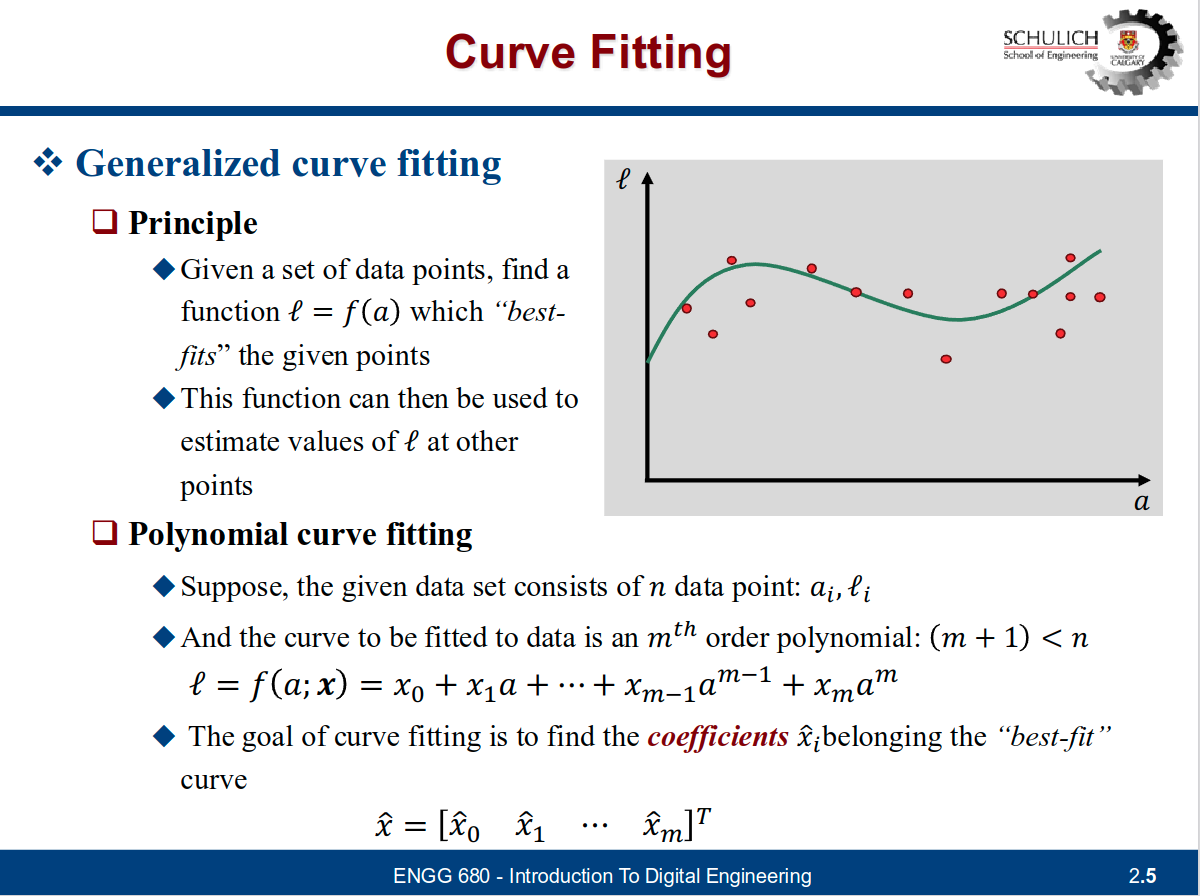

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np                            #importing numpy library
import matplotlib.pyplot as plt               #importing matplot library
import pandas as pd                           #importing pandas library

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)

#importing data from excel
df_data = pd.read_excel('data.xlsx')
#sorting data into numpy array
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)

#seperating the three columns into 3 different variable names for noisy, variance, and true
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

In [ ]:
# step 3
# define the number of observation n
# (1 mark)

#setting number of observations to the length of one of the excel sheet columns
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)

#creating identity matrix to serve as a weight matrix
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a

#setting linspace based on parameters
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


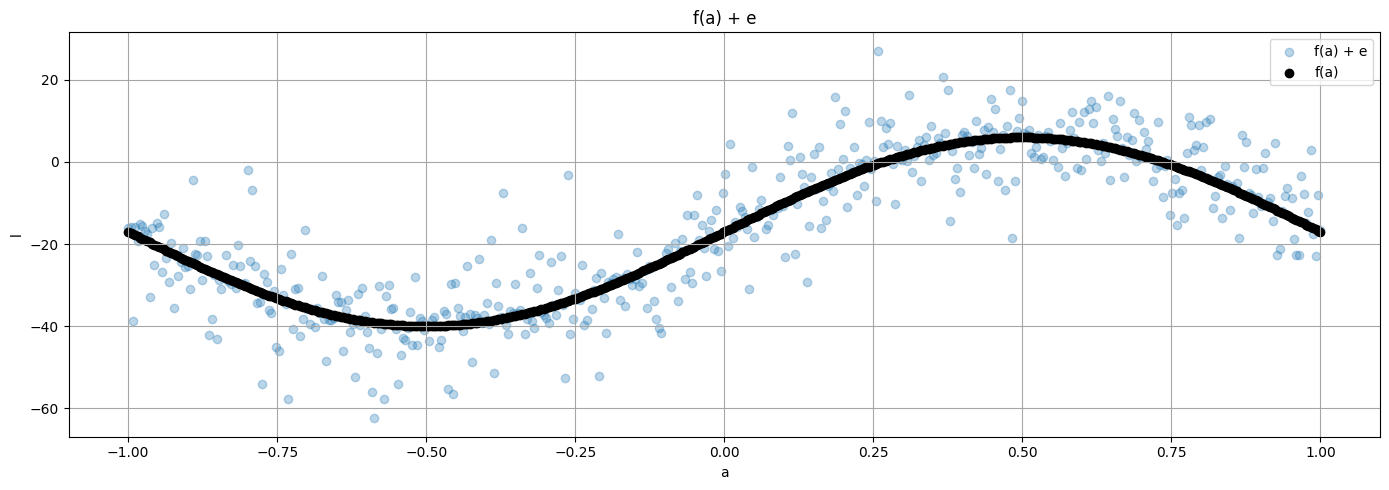

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)
#creating plot settings and size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

#creating new linspace to scale down the plot so that end points are at -1 and 1
a_scale = np.linspace(-1, 1, n)

#creating scatter plots for noisy and true observations based on paramters
plt.scatter(a_scale, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a_scale, l_true, color='k', label='f(a)')

#creating labels, title and legend
plt.legend()
plt.xlabel('a')
plt.ylabel('l')
plt.title('f(a) + e')

#adding grid lines
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

#defining fit polynomial curve function to solve for polynamial coefficients
def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:

    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    #defining design matrix function
    def design_matrix(a, deg):
      # Initialize the design matrix with ones
      DM = np.ones((n, deg + 1))

    # Fill in the the remaining a values
      for i in range(1, deg + 1):
        DM[:, i] = a ** i

      return DM
    #imputing variables a and deg to create design matrix
    DM = design_matrix(a, deg)

    #flipping the matrix in order to have a proper form
    A = np.fliplr(DM)

    # Calculate the estimated coefficients
    x = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ l)

    # Calculate the fitted values
    fitted_values = np.polyval(x, a)

    # Calculate residuals
    v = l - fitted_values

    # Calculate residual variance
    apv = (v.T @ P @ v) / (n - deg + 1)

    # Calculate the covariance of the estimated coefficients
    # Covariance matrix: cov_x = σ² * (A^T * A)⁻¹
    cov_x = apv**2 * np.linalg.inv(A.T @ A)
    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

#iterating for linear solution
deg = 1
x_1, cov_x_1, apv_1, v_1 = fit_polynomial_curve(a, l, P, deg)

#iterating for cubic solution
deg = 3
x_3, cov_x_3, apv_3, v_3 = fit_polynomial_curve(a, l, P, deg)

#iterating for quintic solution
deg = 5
x_5, cov_x_5, apv_5, v_5 = fit_polynomial_curve(a, l, P, deg)

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

#solving linear polynomial function using linear coefficents
line_uw = np.polyval(x_1, a)

#solving cubic polynomial function using cubic coefficents
cubic_uw = np.polyval(x_3, a)

#solving quintic polynomial function using quintic coefficents
quintic_uw = np.polyval(x_5, a)

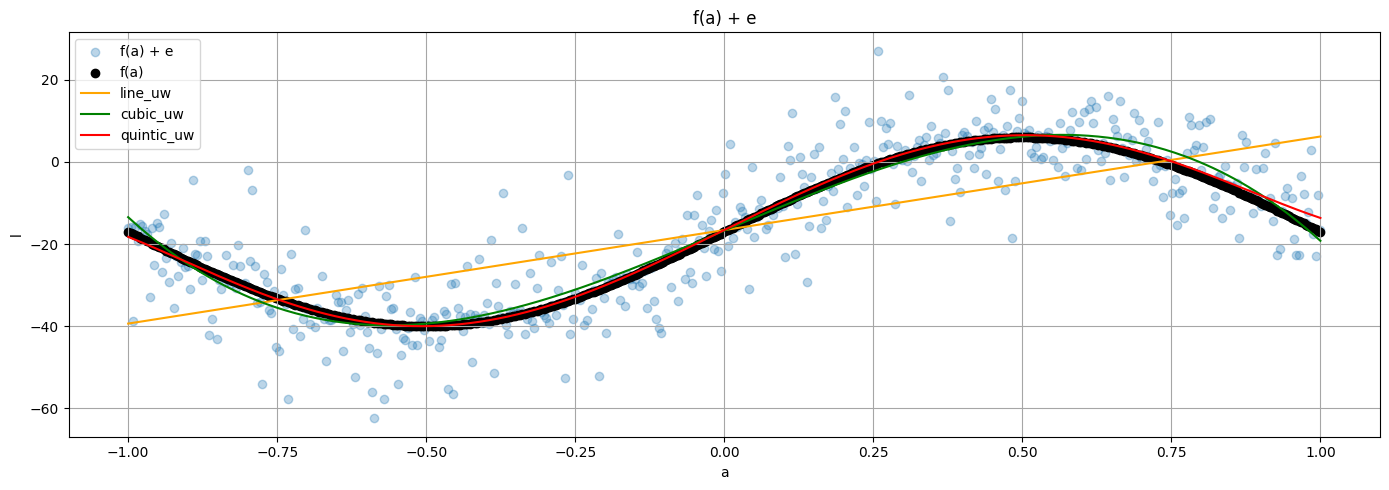

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

#creating plot settings and size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

#replotting the original scatters for noisy and true observations
plt.scatter(a_scale, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a_scale, l_true, color='k', label='f(a)')

#plotting lines for each of the linear, cubic, and quintic solutions
plt.plot(a_scale, line_uw, color='orange', label='line_uw')
plt.plot(a_scale, cubic_uw, color='green', label='cubic_uw')
plt.plot(a_scale, quintic_uw, color='red', label='quintic_uw')

#creating legend, axis labels and title
plt.legend()
plt.xlabel('a')
plt.ylabel('l')
plt.title('f(a) + e')

#adding grid lines
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

#calling stored apv values calculated from fit polynomial curve function
print(f'apv_1: {apv_1}') #linear
print(f'apv_3: {apv_3}') #cubic
print(f'apv_5: {apv_5}') #quintic


apv_1: 162.0916381699047
apv_3: 65.86668635408462
apv_5: 63.50125453086892


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

#computing norm using true observations and the fit lines
norm_1 = np.linalg.norm(l_true - line_uw) #using linear fit
norm_3 = np.linalg.norm(l_true - cubic_uw) #using cubic fit
norm_5 = np.linalg.norm(l_true - quintic_uw) #using quintic fit

#printing results
print(f'norm_1: {norm_1}')
print(f'norm_3: {norm_3}')
print(f'norm_5: {norm_5}')

norm_1: 229.0601679674409
norm_3: 38.285979929116635
norm_5: 17.369967196967163


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
#Since the example above is only weighted using the identity matrix it contains very large values for both APV and the norm.
#However as the degree of fit increases from linear to quintic the APV for the noisy as well as for the true observations decreases.


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

#resetting weight matrix based on variance of observation column form the data excel file
P = np.linalg.inv(np.diag(l_var))

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

#step 6 with weight matrix

#calling fit polynomial curve function to repeat calculations using new weight matrix

#linear
deg = 1
x_1, cov_x_1, apv_1, v_1 = fit_polynomial_curve(a, l, P, deg)

#cubic
deg = 3
x_3, cov_x_3, apv_3, v_3 = fit_polynomial_curve(a, l, P, deg)

#quintic
deg = 5
x_5, cov_x_5, apv_5, v_5 = fit_polynomial_curve(a, l, P, deg)


In [ ]:
#step 7 with weight matrix

#creating polynomial function using new calculated coefficients
line_uw = np.polyval(x_1, a) #linear
cubic_uw = np.polyval(x_3, a) #cubic
quintic_uw = np.polyval(x_5, a) #quintic

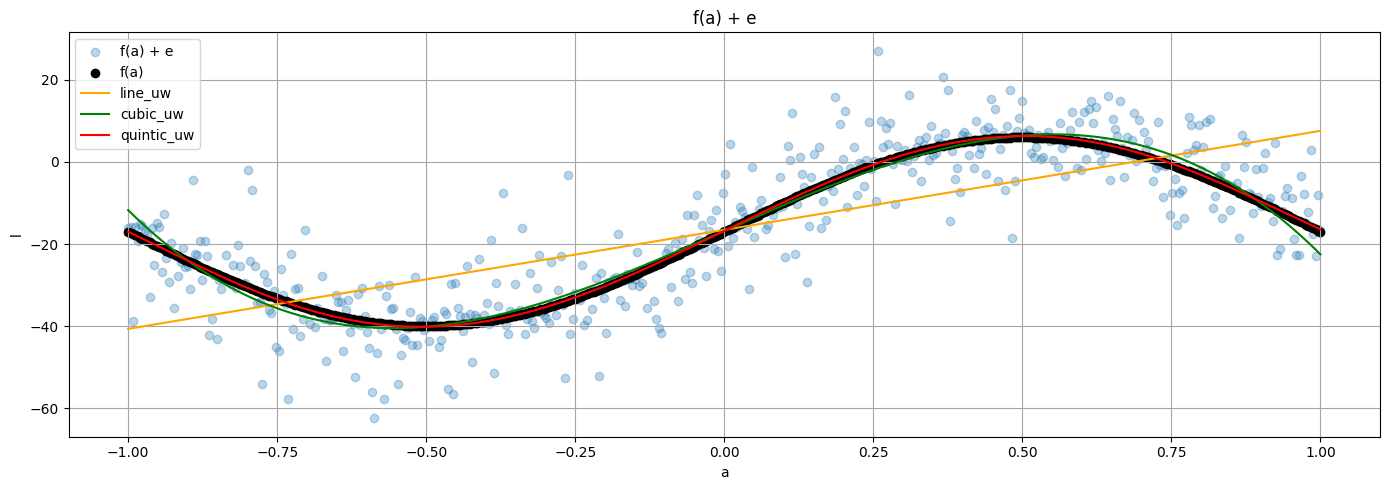

In [ ]:
#step 8 with weight matrix

#creating plot settings and size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

#replotting original noisy and true observations
plt.scatter(a_scale, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a_scale, l_true, color='k', label='f(a)')

#plotting new polynomial functions calculated using updated weight matrix
plt.plot(a_scale, line_uw, color='orange', label='line_uw')
plt.plot(a_scale, cubic_uw, color='green', label='cubic_uw')
plt.plot(a_scale, quintic_uw, color='red', label='quintic_uw')

#creating legend, axis labels and title
plt.legend()
plt.xlabel('a')
plt.ylabel('l')
plt.title('f(a) + e')

#grid lines
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
#step 9 with weight matrix

#calling stored apv values for weighted calculation
print(f'apv_1: {apv_1}') #linear
print(f'apv_3: {apv_3}') #cubic
print(f'apv_5: {apv_5}') #quintic

apv_1: 12.006432628503157
apv_3: 1.1398684588679553
apv_5: 0.9408916265453902


In [ ]:
#step 10 with weight matrix

#calculating norm using updated polynomial fit using weight matrix
norm_1 = np.linalg.norm(l_true - line_uw) #linear
norm_3 = np.linalg.norm(l_true - cubic_uw) #cubic
norm_5 = np.linalg.norm(l_true - quintic_uw) #quintic

#printing calculated values
print(f'norm_1: {norm_1}')
print(f'norm_3: {norm_3}')
print(f'norm_5: {norm_5}')

norm_1: 230.67760813832948
norm_3: 36.070266872667965
norm_5: 5.741606915886233


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

# As expected when adding known weights to equation the goal is to mimimize variation in our fit.
#This can be seen in our results as the APV is much closer to one in all three degrees of measurement, and the L2 norm is much lower for the weighted data set.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

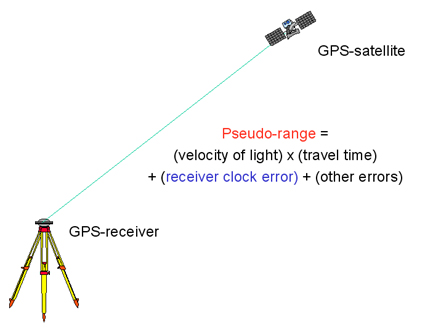

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)

#importing pseudorange excel file
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
#importing satellite position excel file
df_sat_pos = pd.read_excel('satellite_position.xlsx')

#assigning pseudorange excel file to numpy array
pseudorange = np.array(df_pseudorange)
#ignoring satellite id column
pseudorange = np.delete(pseudorange, np.s_[0:1], axis = 1)
#assigning satellite postion excel file to numpy array
sat_pos = np.array(df_sat_pos)
#creating new array for the xyz coordinates without the satellite id column
sat_pos_xyz = np.delete(sat_pos, np.s_[0:1], axis = 1)

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

n = 11
m = 4

#setting range for number of measurements used for w and A matrixes
a = [1,2,3,4,5,6,7,8,9,10,11]

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

P = np.identity(n)                  #setting weight matrix P as identity matrix makes it so observations are independent from each other

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)

#setting initial states to zero with size m
x_0 = np.array([0.0,0.0,0.0,0.0]).reshape(1,4)

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver

GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)

#giving delta the same shape as x_0
delta = np.ones(m)

#setting iterations to 0
i = 0

#creating arrays to be used to store calculated values
arr_w = []
arr_delta= []
arr_err_pos = []
arr_i = []

#creating x_hat variable using initial state of x_0
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)


def euclidean_norm(receiver_pos, satellite_pos):
    distance = np.array([np.linalg.norm(satellite_pos - receiver_pos[0,:3], axis=1)]).reshape(11,1)                                     #calculating Euclidean distance using np.linalg.norm function, reshaping results to (11, 1)
    return distance

In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):

  c1 = np.zeros((11,1))                                   #initializing columns c1, c2, c3, and c4
  c2 = np.zeros((11,1))
  c3 = np.zeros((11,1))
  c4 = np.ones((11,1)) * -1

  for j in a:
    c1[j-1] = (r_pos[0,0] - s_pos[j-1,0])/(rho[j-1])        #filling out columns by vectorizing
    c2[j-1] = (r_pos[0,1] - s_pos[j-1,1])/(rho[j-1])
    c3[j-1] = (r_pos[0,2] - s_pos[j-1,2])/(rho[j-1])

  A = np.hstack((c1,c2,c3,c4))                                  #horizontally stacking output

  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while np.linalg.norm(delta[:3]) > 0.001:

    # Compute the geometric distance between Satellites and receiver, using the euclidean_norm function we just defined
    rho = euclidean_norm(x_hat, sat_pos_xyz)

    # Compute the design matrix A
    A = design_matrix(x_hat, sat_pos_xyz, rho)

    # Compute the misclosure array w
    w = np.zeros((11,1))
    for j in a:
      w[j-1] = pseudorange[j-1] - (rho[j-1] - 1)

    # Compute the corrections delta
    delta = np.linalg.pinv(A.T @ A) @ (A.T @ w)

    # Update the states
    x_hat += delta.T

    # Compute the position error from using the updated states against ground truth
    err_pos = GroundTruth - x_hat[0,:3]

    # Update the counter i (increment by 1 for each iteration)
    i += 1

    # # Store the misclosure, delta, position error, and counter from each iteration into arrays for plotting
    arr_w.append(w)
    arr_delta.append(delta.T)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

arr_w = np.array(arr_w)
arr_w = arr_w.reshape(5,1,11)
arr_w = arr_w.reshape(5,11)

arr_delta = np.array(arr_delta)
arr_delta = arr_delta.reshape(5,4)

arr_err_pos = np.array(arr_err_pos)

arr_i = np.array(arr_i)
# # After convergence, compute the A Posteriori Variance of Unit Weight
v = w - (A @ delta)
apv = (v.T @ P @ v) / (n - m)

# Compute the Covariance matrix of estimated states
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print('The values after the final iteration are as follows\n')
print(f"Estimated States: {x_hat}\n")
print(f"Corrections Array (delta):\n {delta}\n")
print(f"Estimated Measurements Residuals (w):\n {w}\n")
print(f"A Posteriori Variance of Unit Weight: {apv}\n")
print(f"Covariance Matrix of Estimated States:\n{C_x_hat}\n")
print(f"Number of Iterations:\n {i}\n")
print(f"3-D Position Errors:\n {err_pos}")

The values after the final iteration are as follows

Estimated States: [[-1633492.44451686 -3651629.54237943  4952485.43270835 -1266161.46031264]]

Corrections Array (delta):
 [[ 3.22972326e-06]
 [ 6.39345782e-06]
 [-1.75989242e-05]
 [-7.47201390e+00]]

Estimated Measurements Residuals (w):
 [[7.73199449]
 [7.58320138]
 [6.37251963]
 [7.46702535]
 [7.67233761]
 [6.05386584]
 [7.38075615]
 [8.98411366]
 [7.73568201]
 [8.08340714]
 [7.12735872]]

A Posteriori Variance of Unit Weight: [[0.88528886]]

Covariance Matrix of Estimated States:
[[ 0.28298264  0.06167139 -0.07487066  0.06468701]
 [ 0.06167139  0.37666273 -0.51441611  0.32601524]
 [-0.07487066 -0.51441611  1.81094829 -0.9773772 ]
 [ 0.06468701  0.32601524 -0.9773772   0.61904476]]

Number of Iterations:
 5

3-D Position Errors:
 [ 3.06483961  2.3598758  -3.81315917]


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

#A value of the Posteriori Variance of Unit Weight of 1 indicates a good fit of the model, so our value of 0.885 is relatively close to 1 after 5 iterations,
#since our value is less than 1 indicates residuals are slightly smaller than observed values

#For the Covariance matrix of estimated stress, our results indicate the greatest values for the Z position with the highest variance, so uncertainty is greatest for the vertical positioning
#The clock bias of 0.619 is also a bit higher than the variance of the x and y positions, but less than the z position, so there is a bit more uncertainty in the clock bias
#the variance of 0.28 for the x position 0.37 for the y position are relativey small which indicates a higher degree of certainty for these two positions


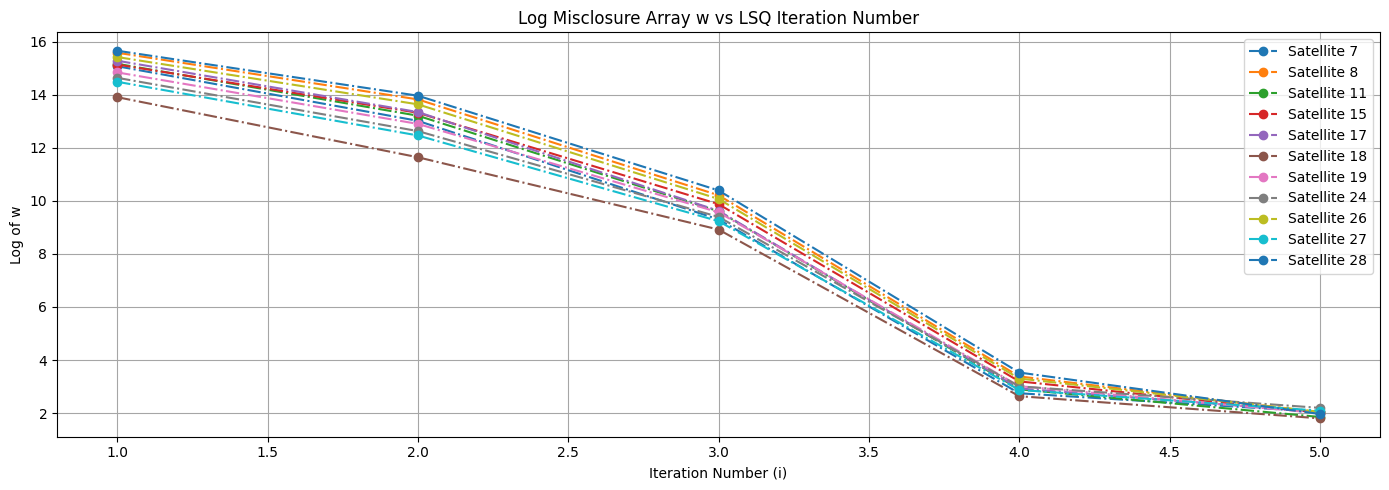

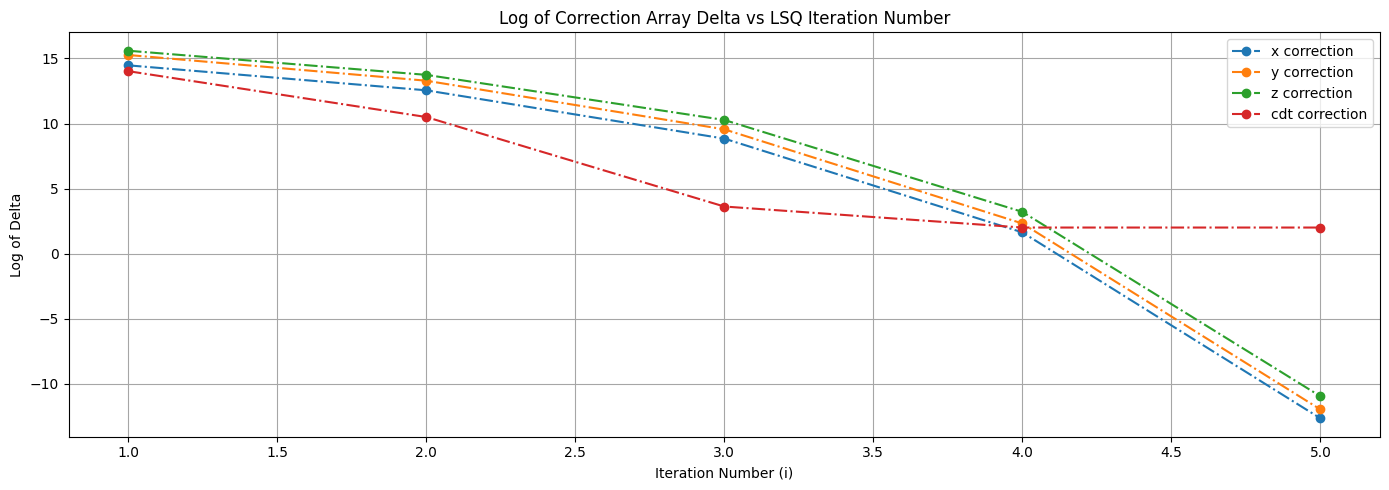

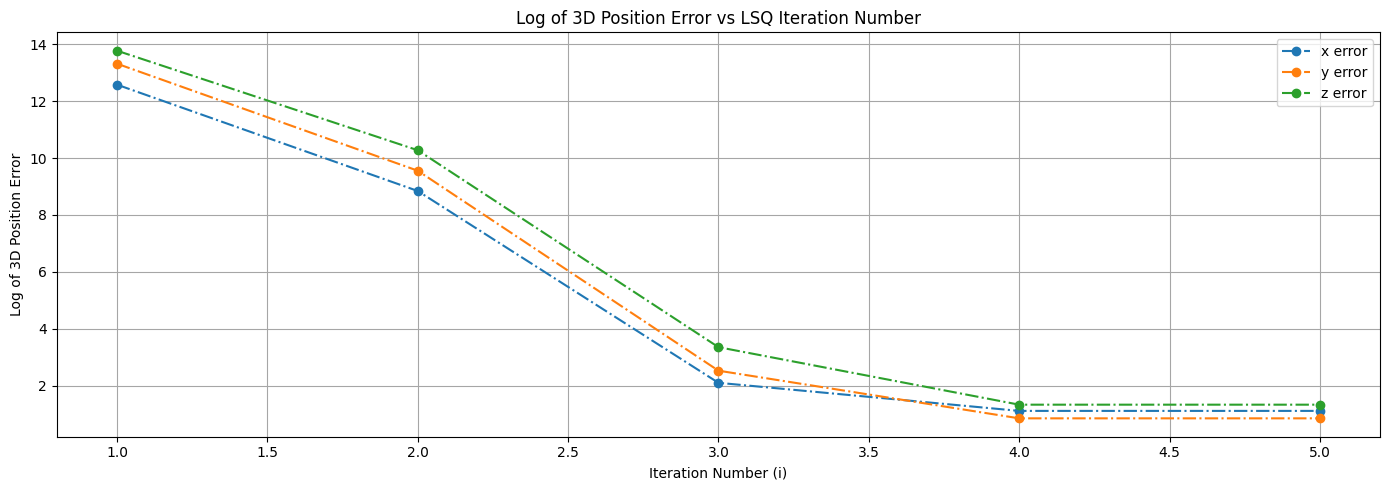

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)

#creating plot settings and size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log(Misclosure Array)', linestyle='-.', marker='o')

#Plot Settings
# Add axis labels, title, grid, and legend
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of w')
plt.title('Log Misclosure Array w vs LSQ Iteration Number')
plt.legend(["Satellite 7", "Satellite 8", "Satellite 11","Satellite 15", "Satellite 17", "Satellite 18","Satellite 19", "Satellite 24", "Satellite 26", "Satellite 27", "Satellite 28"])


ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)

#creating plot settings and size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log(Correction Array)', linestyle='-.', marker='o')

#Plot Settings
# Add axis labels, title, grid, and legend
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Delta')
plt.title('Log of Correction Array Delta vs LSQ Iteration Number')
plt.legend(["x correction", "y correction", "z correction","cdt correction"])


ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

#creating plot settings and size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log(3D position error)', linestyle='-.', marker='o')

#Plot Settings
# Add axis labels, title, grid, and legend
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of 3D Position Error')
plt.title('Log of 3D Position Error vs LSQ Iteration Number')
plt.legend(["x error", "y error", "z error"])


ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)



In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!

#The receiver is located somewhere in the vicinity of the U of C